In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_educational_qq_plot(data, ax, title, dist_name, show_histogram=True):
    """
    Create an educational Q-Q plot with additional information and histogram.
    
    Parameters:
    -----------
    data : array-like
        The data to be plotted
    ax : matplotlib axis
        The axis to plot on
    title : str
        Title for the plot
    dist_name : str
        Name of the distribution for labeling
    show_histogram : bool
        Whether to show the histogram inset
    """
    # Calculate theoretical quantiles and ordered data
    ordered_data = np.sort(data)
    n = len(data)
    theoretical_probs = (np.arange(1, n + 1) / (n + 1))
    theoretical_quantiles = stats.norm.ppf(theoretical_probs)

    # Create the Q-Q plot
    ax.scatter(theoretical_quantiles, ordered_data,
              alpha=0.6, label=f'{dist_name} Data', color='blue')

    # Add reference line
    line_x = np.array([theoretical_quantiles.min(), theoretical_quantiles.max()])
    line_y = np.array([ordered_data.min(), ordered_data.max()])
    ax.plot(line_x, line_y, 'r--', label='Reference Line', linewidth=2)

    # Add histogram as inset if requested
    if show_histogram:
        # Create inset axes for histogram
        axins = ax.inset_axes([0.65, 0.1, 0.3, 0.3])
        axins.hist(data, bins=30, density=True, alpha=0.6, color='blue')
        
        # Add normal curve to histogram for comparison
        x_range = np.linspace(min(data), max(data), 100)
        if dist_name == "Normal":
            mu, std = np.mean(data), np.std(data)
            normal_pdf = stats.norm.pdf(x_range, mu, std)
            axins.plot(x_range, normal_pdf, 'r-', linewidth=2,
                      label='Normal PDF')
        
        axins.set_title('Distribution Shape', fontsize=10)
        axins.tick_params(labelsize=8)

    # Customize the main plot
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

def compare_distributions(nsamples: int):
    """
    Create an educational comparison between normal and skewed distributions
    using Q-Q plots.
    """
    # Create figure with 1x3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
    fig.suptitle('Understanding Q-Q Plots: Normal vs Skewed Distributions',
                fontsize=16, y=1.05)

    # Generate data
    np.random.seed(42)  # For reproducibility
    
    # Normal distribution
    normal_data = np.random.normal(0, 1, nsamples)
    create_educational_qq_plot(
        normal_data, ax1,
        "Normal Distribution\nPoints follow the reference line",
        "Normal"
    )

    # Right-skewed distribution (Chi-square)
    right_skewed_data = np.random.chisquare(df=3, size=nsamples)
    create_educational_qq_plot(
        right_skewed_data, ax2,
        "Right-Skewed Distribution\nNote the upward curve deviation",
        "Right-Skewed"
    )

    # Left-skewed distribution (Beta with appropriate parameters)
    left_skewed_data = np.random.beta(a=8, b=2, size=nsamples)
    create_educational_qq_plot(
        left_skewed_data, ax3,
        "Left-Skewed Distribution\nNote the downward curve deviation",
        "Left-Skewed"
    )

    # Add explanatory text
    fig.text(0.05, 0.72,
             "Normal Distribution: Points closely follow the reference line,\n" +
             "indicating the data follows a normal distribution.",
             fontsize=10, ha='left')
    
    fig.text(0.38, 0.72,
             "Right-Skewed Distribution: Points curve upward from the line,\n" +
             "indicating a longer tail on the right side.",
             fontsize=10, ha='left')
    
    fig.text(0.7, 0.72,
             "Left-Skewed Distribution: Points curve downward from the line,\n" +
             "indicating a longer tail on the left side.",
             fontsize=10, ha='left')

    plt.tight_layout()
    return fig


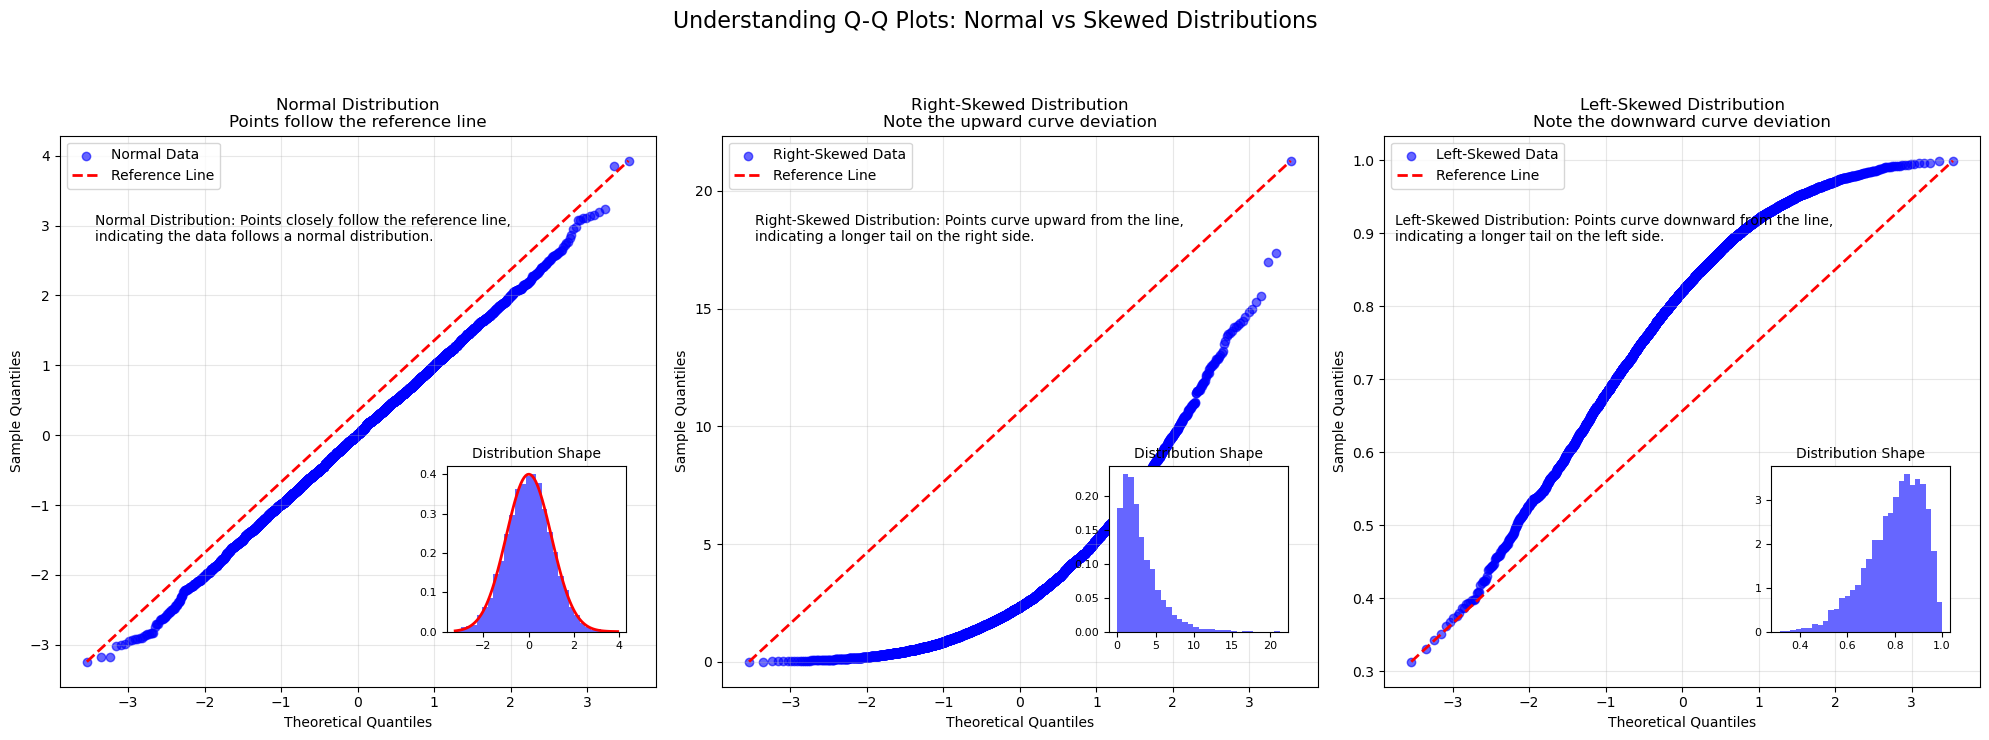

In [40]:
# Create and display the comparison
nsamples = 5000

fig = compare_distributions(nsamples)
plt.show()